In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('house_price.csv')

DATA PREPROCESSING

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [13]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [15]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [17]:
# Check for missing values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [19]:
df.duplicated().sum()

1049

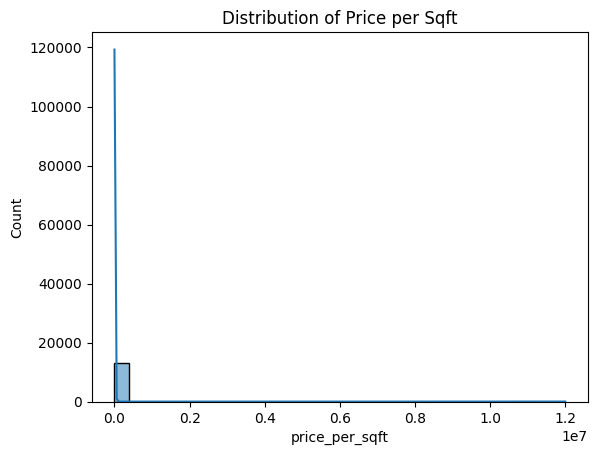

In [21]:
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title("Distribution of Price per Sqft")
plt.show()

Q2. Outlier Detection and Removal

(a) Mean and Standard Deviation Method.

In [51]:
# threshold=3

mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std
print("mean_price_per_sqft:",mean)
print("\nstd_dev_price_per_sqft:",std)
print("\nlower_bound:",lower_bound)
print("\nupper_bound:",upper_bound)

mean_price_per_sqft: 7920.336742424242

std_dev_price_per_sqft: 106727.16032810845

lower_bound: -312261.1442419011

upper_bound: 328101.8177267496


In [25]:
# Remove outliers
df_mean_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
df_mean_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [29]:
outliers_mean=df[(df["price_per_sqft"]<lower_bound)|(df["price_per_sqft"]>upper_bound)]
print("Number of outliers detected using mean function : ",len(outliers_mean))

Number of outliers detected using mean function :  5


(b) Percentile Method

In [49]:
# Remove values below the 5th percentile and above the 95th percentile
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
print("lower_percentile:",lower_percentile)
print("\nupper_percentile:",upper_percentile)

lower_percentile: 3107.8500000000004

upper_percentile: 15312.099999999984


In [35]:
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]
df_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [37]:
outliers_percentile=df[(df["price_per_sqft"]<lower_percentile)|(df["price_per_sqft"]>upper_percentile)]
print("Number of outliers detected using percentile method : ",len(outliers_percentile))

Number of outliers detected using percentile method :  1320


In [39]:
#(c) IQR (Interquartile Range) Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:",Q1)
print("\nQ3:",Q3)
print("\nIQR:",IQR)

Q1: 4267.0

Q3: 7317.0

IQR: 3050.0


In [41]:
IQR_lower_bound = Q1 - 1.5 * IQR
IQR_upper_bound = Q3 + 1.5 * IQR
print("IQR_lower_bound:",IQR_lower_bound)
print("IQR_upper_bound:",IQR_upper_bound)

IQR_lower_bound: -308.0
IQR_upper_bound: 11892.0


In [43]:
df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
df_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [47]:
# detect outliers
outliers_IQR=df[(df["price_per_sqft"]<IQR_lower_bound)|(df["price_per_sqft"]>IQR_upper_bound)]
print("Number of outliers detected by IQR method : ",len(outliers_IQR))

Number of outliers detected by IQR method :  1265


(d) Z-Score Method

In [106]:
from scipy.stats import zscore

df['z_score'] = zscore(df['price_per_sqft'])

In [108]:
# threshold=3
df_zscore = df[(df['z_score'] >= -3) & (df['z_score'] <= 3)]
df_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039554
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030971
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033876
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015698
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034391
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011538
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029897
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024946
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023300


In [110]:
# outlier detection
outliers_zscore=df[(df["price_per_sqft"]>3)|(df["price_per_sqft"]<-3)]
print("Number of outliers detected using Zscore method : ",len(outliers_zscore))

Number of outliers detected using Zscore method :  13200


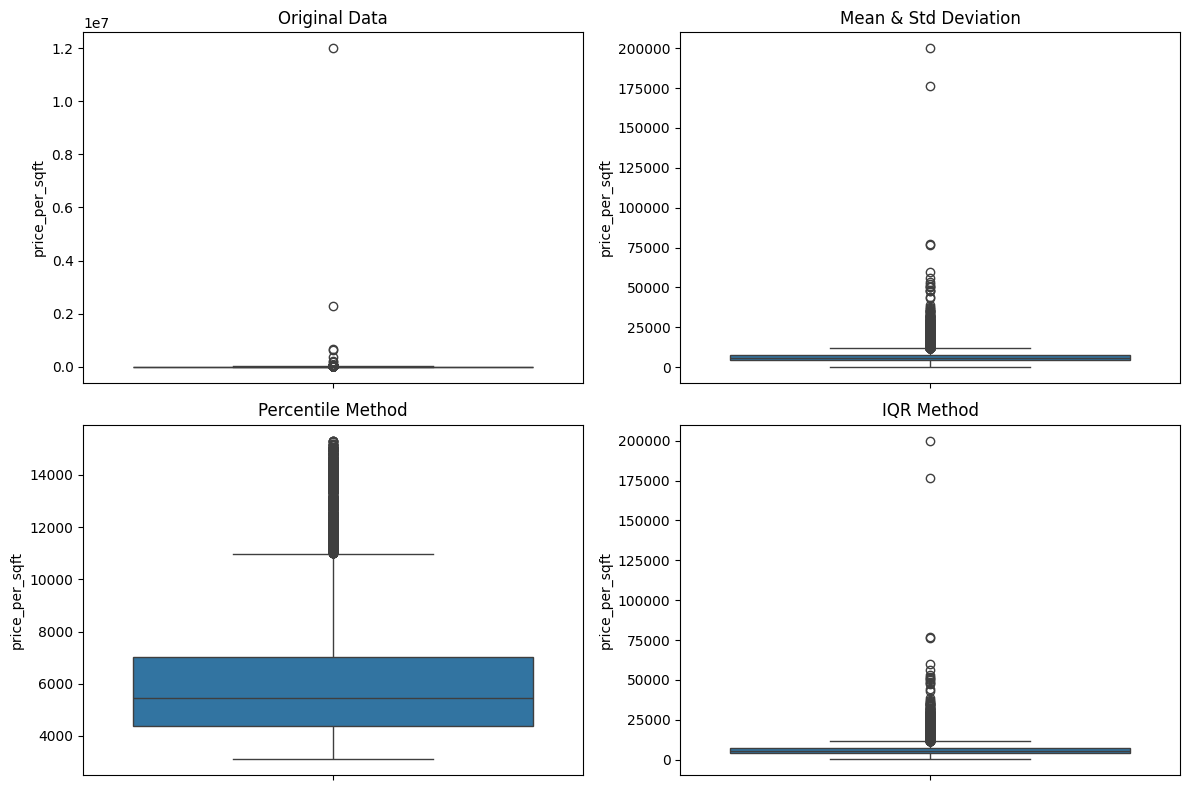

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0]).set_title("Original Data")
sns.boxplot(df_mean_std['price_per_sqft'], ax=axes[0, 1]).set_title("Mean & Std Deviation")
sns.boxplot(df_percentile['price_per_sqft'], ax=axes[1, 0]).set_title("Percentile Method")
sns.boxplot(df_iqr['price_per_sqft'], ax=axes[1, 1]).set_title("IQR Method")
plt.tight_layout()
plt.show()

Q4. Histogram, Skewness, and Transformations

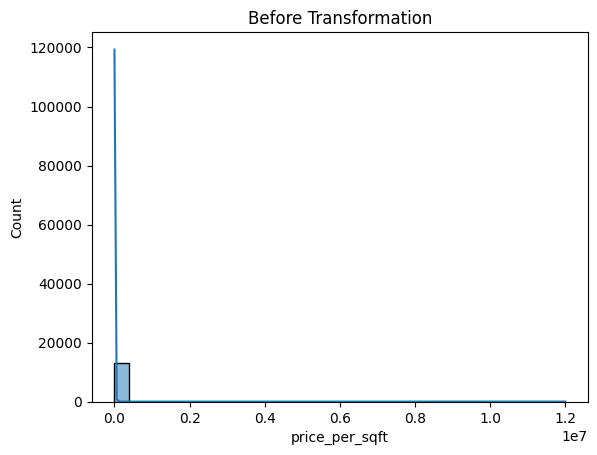

Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


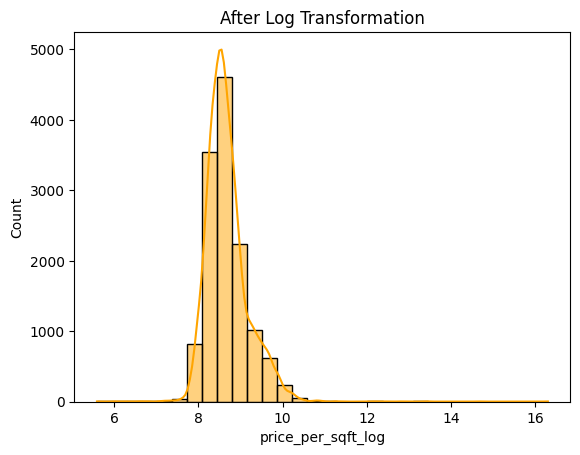

Skewness after Log: 1.4003259019533636
Kurtosis after Log: 9.203000543610957


In [82]:
from scipy.stats import skew, kurtosis

# Histogram before transformation
sns.histplot(df['price_per_sqft'], kde=True, bins=30)
plt.title("Before Transformation")
plt.show()

# Skewness and Kurtosis
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Histogram after transformation
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30, color='orange')
plt.title("After Log Transformation")
plt.show()

print("Skewness after Log:", skew(df['price_per_sqft_log']))
print("Kurtosis after Log:", kurtosis(df['price_per_sqft_log']))


Q5. Correlation Matrix and Heatmap

In [92]:
df_new = df.drop(['location', 'size','price_per_sqft'], axis=1)
df_new.head()

,total_sqft,bath,price,bhk,z_score,price_per_sqft_log
0,1056.0,2.0,39.07,2.0,-0.039554,8.216088
1,2600.0,5.0,120.00,4.0,-0.030971,8.437284
2,1440.0,2.0,62.00,3.0,-0.033876,8.367765
3,1521.0,3.0,95.00,3.0,-0.015698,8.739697
4,1200.0,2.0,51.00,2.0,-0.034391,8.354910


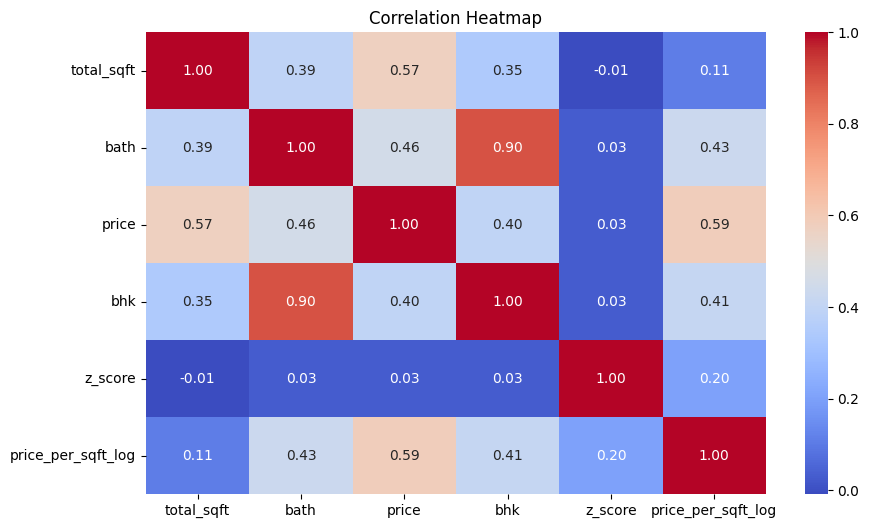

In [94]:

corr = df_new.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Q6. Scatter Plots

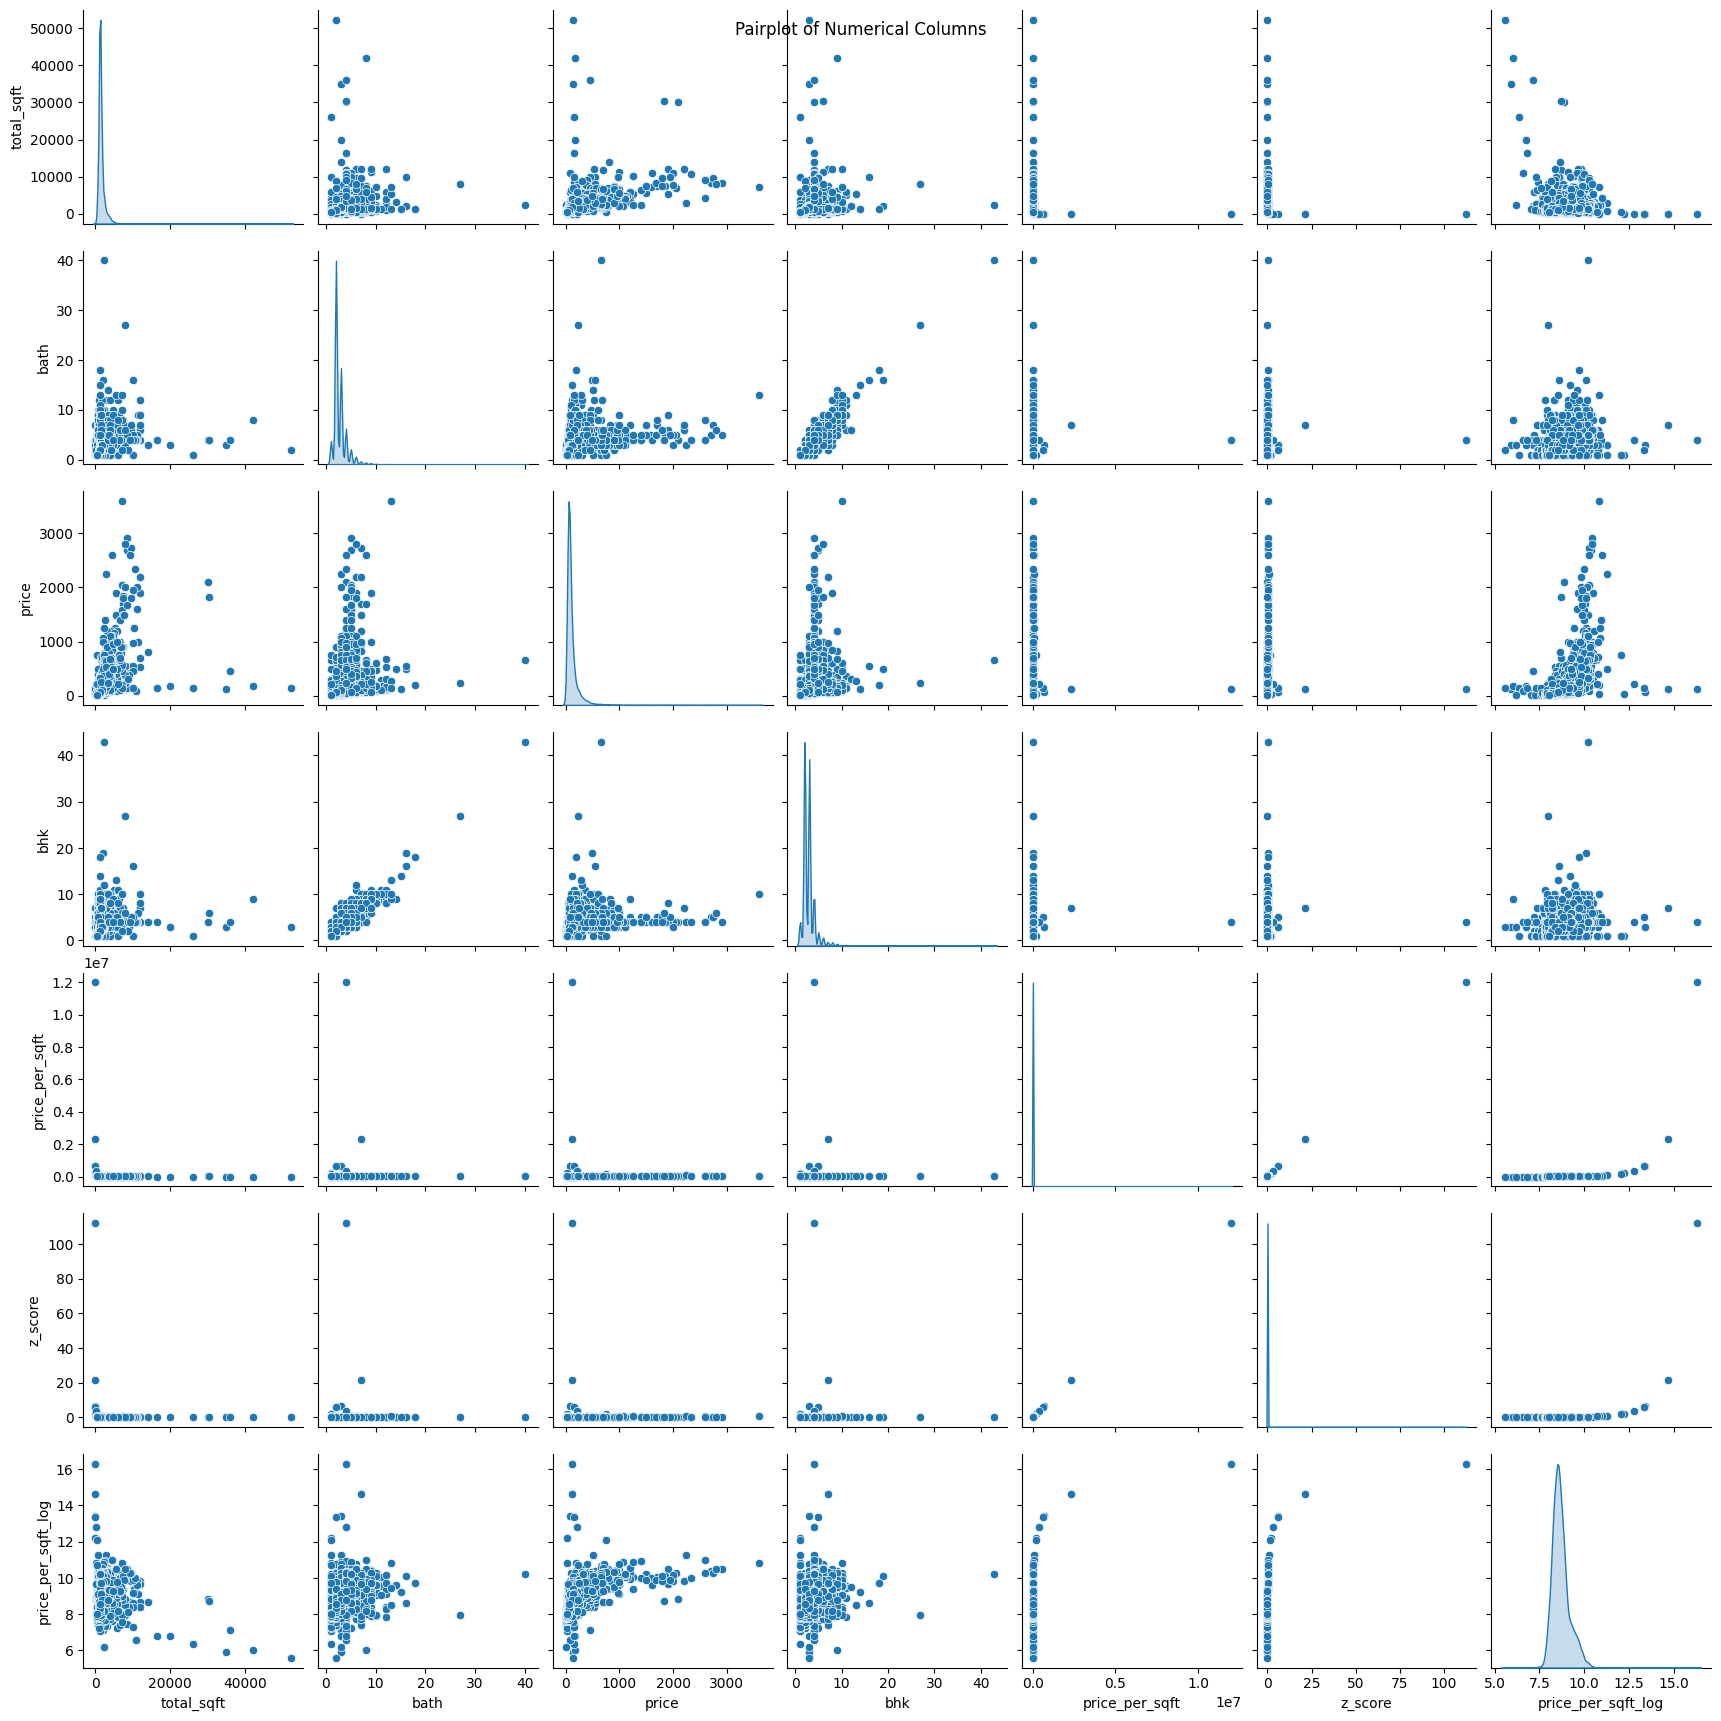

In [98]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of Numerical Columns')
plt.show()